In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [ ]:
# loading the dataset to a pandas DataFrame
credit_card_data = pd.read_csv("/content/creditcard.csv")

In [ ]:
credit_card_data.describe

<bound method NDFrame.describe of             Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
170458  120193.0  2.032686 -0.070219 -1.093517  0.467291 -0.321890 -1.505390   
170459  120193.0 -0.454479  1.201642  0.081936 -0.695024  0.410704 -1.057838   
170460  120194.0  2.094119 -1.713483 -0.778604 -1.611163 -1.361482 -0.085073   
170461  120194.0 -3.644269 -0.747473 -0.267792 -0.807058 -0.947888  2.388635   
170462  120194.0 -0.085730  1.014485 -0.708676 -0.798981  0.964767 -0.327944   

     

In [ ]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170458,120193.0,2.032686,-0.070219,-1.093517,0.467291,-0.321890,-1.505390,0.147641,-0.345532,0.724209,...,0.283248,0.955811,0.067464,0.417168,0.157534,-0.121672,-0.017449,-0.055632,1.00,0.0
170459,120193.0,-0.454479,1.201642,0.081936,-0.695024,0.410704,-1.057838,1.041520,-0.210913,0.225049,...,-0.312785,-0.531973,0.083066,-0.005112,-0.375916,0.150884,0.476890,0.223036,13.98,0.0
170460,120194.0,2.094119,-1.713483,-0.778604,-1.611163,-1.361482,-0.085073,-1.331477,0.037524,-1.286570,...,-0.048644,0.152273,0.232052,0.681825,-0.346774,-0.233445,0.006162,-0.035610,88.00,0.0
170461,120194.0,-3.644269,-0.747473,-0.267792,-0.807058,-0.947888,2.388635,-2.097686,2.285523,0.114737,...,-0.408052,0.103611,0.656432,-0.966815,-0.365917,-0.226191,-0.090287,-0.423226,53.86,0.0


In [ ]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
170458,120193.0,2.032686,-0.070219,-1.093517,0.467291,-0.321890,-1.505390,0.147641,-0.345532,0.724209,...,0.283248,0.955811,0.067464,0.417168,0.157534,-0.121672,-0.017449,-0.055632,1.00,0.0
170459,120193.0,-0.454479,1.201642,0.081936,-0.695024,0.410704,-1.057838,1.041520,-0.210913,0.225049,...,-0.312785,-0.531973,0.083066,-0.005112,-0.375916,0.150884,0.476890,0.223036,13.98,0.0
170460,120194.0,2.094119,-1.713483,-0.778604,-1.611163,-1.361482,-0.085073,-1.331477,0.037524,-1.286570,...,-0.048644,0.152273,0.232052,0.681825,-0.346774,-0.233445,0.006162,-0.035610,88.00,0.0
170461,120194.0,-3.644269,-0.747473,-0.267792,-0.807058,-0.947888,2.388635,-2.097686,2.285523,0.114737,...,-0.408052,0.103611,0.656432,-0.966815,-0.365917,-0.226191,-0.090287,-0.423226,53.86,0.0
170462,120194.0,-0.085730,1.014485,-0.708676,-0.798981,0.964767,-0.327944,0.716129,0.186059,0.208413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.shape

(170463, 31)

In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

In [ ]:
# checking the number of missingvalues in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

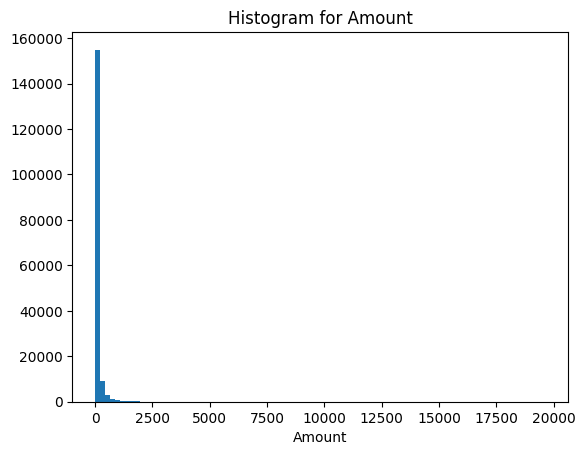

In [ ]:
plt.hist(credit_card_data['Amount'],bins=90)
plt.xlabel('Amount')
plt.title('Histogram for Amount')
plt.show()

In [ ]:
# distribution of legit transactions and fraudulent transactions
credit_card_data["Class"].value_counts()

0.0    170102
1.0       360
Name: Class, dtype: int64

This Dataset is highly unblanced

0 ->Normal Transaction
1 ->fraudulent transction


In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(170102, 31)
(360, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    170102.000000
mean         87.272509
std         246.067820
min           0.000000
25%           5.490000
50%          21.890000
75%          76.500000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     360.000000
mean      111.576722
std       227.309252
min         0.000000
25%         1.000000
50%        11.385000
75%       104.007500
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,60954.436285,-0.159027,0.032193,0.513948,0.108071,-0.168484,0.061850,-0.066521,0.031054,0.025195,...,0.030372,-0.030393,-0.084402,-0.022560,0.009386,0.092777,0.012642,0.001681,0.002371,87.272509
1.0,56649.477778,-6.026758,4.406926,-7.976571,4.889177,-4.367960,-1.436827,-7.017053,0.745264,-2.863575,...,0.405161,0.793171,-0.025930,-0.037556,-0.073778,0.080099,0.038996,0.182902,0.052482,111.576722


Under-Sampling


Number of Fraudulent Transactions->360

In [ ]:
legit_sample=legit.sample(n=360)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52950,45733.0,1.295875,-0.702899,0.461668,-0.799998,-1.014488,-0.396833,-0.734885,-0.047079,-0.953398,...,0.416960,1.051754,-0.240170,0.081486,0.586489,-0.029923,0.007828,0.012982,55.50,0.0
52419,45447.0,1.340622,-0.238565,-0.581796,-1.734468,0.266176,-0.199837,0.066350,-0.198650,1.002422,...,0.029861,0.288175,-0.310214,-1.203418,0.800849,0.239235,0.012001,-0.000093,30.39,0.0
29175,35352.0,-2.757006,-0.586149,1.754538,-0.846885,-0.651756,0.302731,-1.171723,1.467633,-0.100754,...,0.428524,0.823589,0.213844,-0.233224,-0.011713,1.055225,-0.193783,-0.481302,7.00,0.0
126285,77975.0,1.180419,-0.421325,1.009455,-0.693987,-1.222828,-0.552232,-0.674399,0.110439,1.864493,...,0.031451,0.351288,0.039601,0.411698,0.368438,-0.675549,0.107573,0.034207,1.00,0.0
45653,42440.0,0.818772,-0.220198,-0.326233,1.220110,0.063647,-0.311131,0.590618,-0.083229,-0.548265,...,0.190477,0.141077,-0.287293,0.032863,0.655645,-0.286732,-0.036168,0.029489,192.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1001,756,1.183743,0.115571,0.846517,0.928534,-0.539676,-0.119024,-0.418418,0.145655,0.167487,...,-0.034568,-0.129033,0.011820,-0.032545,0.322960,-0.507392,0.042921,0.022444,2.50,0.0
3051,2613,-1.463178,1.538825,0.787465,-0.102192,-0.626390,-0.359723,-0.213734,1.087096,-0.768673,...,-0.081620,-0.407118,0.135313,0.192189,-0.237686,0.080362,0.135568,0.032380,9.99,0.0
1405,1085,0.985940,-0.294685,1.133313,1.474096,-1.065535,-0.234097,-0.457073,0.062174,0.754897,...,0.176458,0.455916,-0.166385,0.410243,0.460743,-0.251661,0.048013,0.051577,99.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [ ]:
new_dataset["Class"].value_counts()

0.0    205
1.0      2
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1580.819512,-0.277524,0.289550,0.750229,0.037966,-0.065421,0.184810,0.075389,-0.074407,0.001701,...,0.088137,0.045731,-0.095139,-0.021691,0.033378,0.131919,-0.019657,0.038428,0.010684,70.297854
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Splitting the data into features and Targets

In [ ]:
X = new_dataset[["Amount"]]
Y = new_dataset["Class"]

In [ ]:
print(X)

        Amount
52950    55.50
52419    30.39
29175     7.00
126285    1.00
45653   192.00
...        ...
157918  635.10
163149   17.06
163586   65.00
167184  105.89
167305  105.89

[720 rows x 1 columns]


In [ ]:
2

2

In [ ]:
print(Y)

52950     0.0
52419     0.0
29175     0.0
126285    0.0
45653     0.0
         ... 
157918    1.0
163149    1.0
163586    1.0
167184    1.0
167305    1.0
Name: Class, Length: 720, dtype: float64


Split the Data into Training data and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(720, 1) (540, 1) (180, 1)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_test_predict = model.predict(X_test)

Model Evaluation

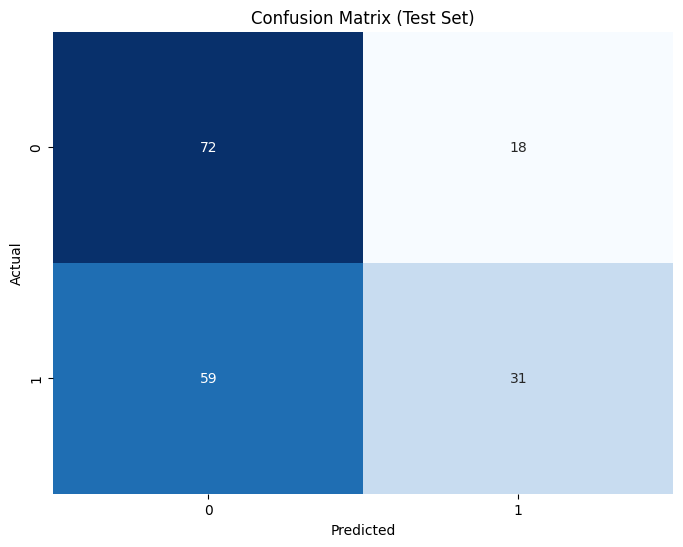

In [ ]:
# Plot a confusion matrix for the test set
conf_matrix = confusion_matrix(Y_test, Y_test_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [ ]:
# Create a classification report for the test set
class_report = classification_report(Y_test, Y_test_predict)
print("Classification Report (Test Set):\n", class_report)

Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.55      0.80      0.65        90
         1.0       0.63      0.34      0.45        90

    accuracy                           0.57       180
   macro avg       0.59      0.57      0.55       180
weighted avg       0.59      0.57      0.55       180



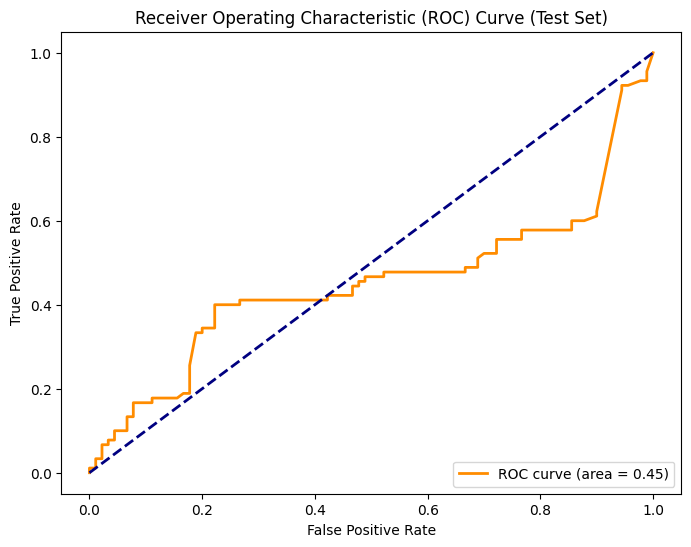

In [ ]:
# Plot the Receiver Operating Characteristic (ROC) curve for the test set
Y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()

Accuracy Score

In [ ]:
# accuracy on training data
from sklearn import metrics
X_train_prediction = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy on Training data :", training_data_accuracy)

Accuracy on Training data : 0.575925925925926


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy on Test data :", test_data_accuracy)